In [1]:
%matplotlib inline
# Dependencies
import pandas as pd
import numpy as np
import time
import datetime
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store_counts_original = pd.read_csv("Resources/Counts_labeledbetter.csv")
store_bins = pd.read_csv("Resources/bins.csv")
store_counts_original.describe()

,StoreID,DF_Month,numericalDay,Day,Year,CouponsRedeemed,DiscountsApplied,HouseComps,BadService,TotCustbyDay,NewCust,DeliveryCount,PickupCount,WalkinCount,DineinCount,Dinein_2Count,WalkthroughWL,GrubhubDeliveryCt,GrubhubPUorBeer
count,54441.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000
mean,10862.413567,6.392825,4.004735,15.699701,2015.045120,53.596330,8.098535,2.157980,0.624798,258.210626,20.275312,58.139548,76.381859,79.437905,30.768574,0.831519,11.193610,0.377812,1.129148
std,3512.534086,3.390973,1.999863,8.769738,2.028715,50.286335,7.532006,2.639356,0.953211,162.850715,17.289787,48.720466,58.305628,63.090870,32.706801,2.715224,55.785002,1.714351,5.631766
min,122.000000,1.000000,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10688.000000,3.000000,2.000000,8.000000,2014.000000,16.000000,3.000000,0.000000,0.000000,143.000000,8.000000,25.000000,36.000000,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,11834.000000,6.000000,4.000000,16.000000,2015.000000,40.000000,6.000000,1.000000,0.000000,227.000000,17.000000,46.000000,60.000000,68.000000,22.000000,0.000000,0.000000,0.000000,0.000000
75%,12359.000000,9.000000,6.000000,23.000000,2017.000000,77.000000,11.000000,3.000000,1.000000,340.000000,28.000000,78.000000,101.000000,126.000000,47.000000,0.000000,0.000000,0.000000,0.000000
max,78945.000000,12.000000,7.000000,31.000000,2018.000000,1030.000000,274.000000,55.000000,9.000000,1185.000000,285.000000,415.000000,516.000000,869.000000,687.000000,38.000000,541.000000,36.000000,361.000000


In [3]:
store_counts_cleanup = store_counts_original.dropna().astype(int)
store_counts_cleanup.describe()
# store_counts_cleanup.dtypes

,StoreID,DF_Month,numericalDay,Day,Year,CouponsRedeemed,DiscountsApplied,HouseComps,BadService,TotCustbyDay,NewCust,DeliveryCount,PickupCount,WalkinCount,DineinCount,Dinein_2Count,WalkthroughWL,GrubhubDeliveryCt,GrubhubPUorBeer
count,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000
mean,10924.564200,6.392825,4.004735,15.699701,2015.045120,53.596330,8.098535,2.157980,0.624798,258.210626,20.275312,58.139548,76.381859,79.437905,30.768574,0.831519,11.193610,0.377812,1.129148
std,3476.781277,3.390973,1.999863,8.769738,2.028715,50.286335,7.532006,2.639356,0.953211,162.850715,17.289787,48.720466,58.305628,63.090870,32.706801,2.715224,55.785002,1.714351,5.631766
min,122.000000,1.000000,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10688.000000,3.000000,2.000000,8.000000,2014.000000,16.000000,3.000000,0.000000,0.000000,143.000000,8.000000,25.000000,36.000000,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,11834.000000,6.000000,4.000000,16.000000,2015.000000,40.000000,6.000000,1.000000,0.000000,227.000000,17.000000,46.000000,60.000000,68.000000,22.000000,0.000000,0.000000,0.000000,0.000000
75%,12359.000000,9.000000,6.000000,23.000000,2017.000000,77.000000,11.000000,3.000000,1.000000,340.000000,28.000000,78.000000,101.000000,126.000000,47.000000,0.000000,0.000000,0.000000,0.000000
max,78945.000000,12.000000,7.000000,31.000000,2018.000000,1030.000000,274.000000,55.000000,9.000000,1185.000000,285.000000,415.000000,516.000000,869.000000,687.000000,38.000000,541.000000,36.000000,361.000000


In [4]:
store_counts_cleanup["Year Month"] = store_counts_cleanup["Year"]*100 + store_counts_cleanup["DF_Month"]
store_counts_cleanup.head()

,StoreID,DF_Month,numericalDay,Day,Year,CouponsRedeemed,DiscountsApplied,HouseComps,BadService,TotCustbyDay,NewCust,DeliveryCount,PickupCount,WalkinCount,DineinCount,Dinein_2Count,WalkthroughWL,GrubhubDeliveryCt,GrubhubPUorBeer,Year Month
0,78945,7,4,3,2013,28,5,0,1,84,39,11,34,12,0,0,0,0,0,201307
1,13210,7,4,3,2013,25,3,2,0,213,22,54,27,23,109,0,0,0,0,201307
2,13210,7,5,4,2013,2,0,0,0,59,4,3,6,4,46,0,0,0,0,201307
3,122,1,3,1,2013,61,14,6,0,375,26,171,73,56,57,0,0,0,3,201301
4,122,1,4,2,2013,88,17,8,2,400,18,125,64,117,51,0,0,0,21,201301


In [5]:
store_all = pd.DataFrame({
    "Min Year Month" : store_counts_cleanup.groupby(["StoreID"])["Year Month"].min(),
    "Max Year Month" : store_counts_cleanup.groupby(["StoreID"])["Year Month"].max()
}).reset_index()
store_all

,StoreID,Min Year Month,Max Year Month
0,122,201301,201808
1,123,201207,201808
2,10465,201204,201808
3,10584,201301,201808
4,10674,201301,201808
5,10688,201301,201808
6,10766,201208,201808
7,10783,201401,201808
8,11409,201301,201808
9,11467,201301,201808


In [6]:
store_selection = store_all[(store_all["Max Year Month"] == 201808) & (store_all["Min Year Month"] <= 201301)].reset_index()
store_selection

,index,StoreID,Min Year Month,Max Year Month
0,0,122,201301,201808
1,1,123,201207,201808
2,2,10465,201204,201808
3,3,10584,201301,201808
4,4,10674,201301,201808
5,5,10688,201301,201808
6,6,10766,201208,201808
7,8,11409,201301,201808
8,9,11467,201301,201808
9,10,11549,201301,201808


In [7]:
store_final = store_counts_cleanup[store_counts_cleanup["Year Month"] >= 201301].merge(store_selection, on="StoreID", how='inner').merge(store_bins, on="StoreID", how='left')
print(len(store_counts_original))
print(len(store_counts_cleanup))
print(len(store_final))

54463
49424
36740


In [8]:
analysis_data = pd.DataFrame({
    "Total Deliveries" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["DeliveryCount"].sum(),
    "Total Pickups" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["PickupCount"].sum(),
    "Total Walkins" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["WalkinCount"].sum(),
    "Total Dineins" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["DineinCount"].sum(),
    "Average Deliveries" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["DeliveryCount"].mean(),
    "Total Coupons" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["CouponsRedeemed"].sum(),
    "Average Coupons" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["CouponsRedeemed"].mean(),
    "Total Customers" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["TotCustbyDay"].sum(),
    "Total New Customers" : store_final.groupby(["Bins", "StoreID","Year Month","Year"])["NewCust"].sum()
}).reset_index()
analysis_data["Total Transactions"] = analysis_data["Total Deliveries"] + analysis_data["Total Pickups"] + analysis_data["Total Walkins"] + analysis_data["Total Dineins"]
analysis_data["% Deliveries"] = analysis_data["Total Deliveries"] / analysis_data["Total Transactions"]
analysis_data["% Pickups"] = analysis_data["Total Pickups"] / analysis_data["Total Transactions"]
analysis_data["% Walkins"] = analysis_data["Total Walkins"] / analysis_data["Total Transactions"]
analysis_data["% Dineins"] = analysis_data["Total Dineins"] / analysis_data["Total Transactions"]
analysis_data["% Coupons"] = analysis_data["Total Coupons"] / analysis_data["Total Transactions"]
analysis_data["% New Customers"] = analysis_data["Total New Customers"] / analysis_data["Total Customers"]
analysis_data.head()

,Bins,StoreID,Year Month,Year,Total Deliveries,Total Pickups,Total Walkins,Total Dineins,Average Deliveries,Total Coupons,Average Coupons,Total Customers,Total New Customers,Total Transactions,% Deliveries,% Pickups,% Walkins,% Dineins,% Coupons,% New Customers
0,Donald,10688,201301,2013,1658,1910,2554,362,53.483871,1445,46.612903,6459,541,6484,0.255706,0.294571,0.393893,0.055830,0.222856,0.083759
1,Donald,10688,201302,2013,1540,1804,2357,301,55.000000,1287,45.964286,5981,485,6002,0.256581,0.300566,0.392702,0.050150,0.214429,0.081090
2,Donald,10688,201303,2013,1788,2035,2488,383,59.600000,1552,51.733333,6670,558,6694,0.267105,0.304004,0.371676,0.057215,0.231849,0.083658
3,Donald,10688,201304,2013,1626,2014,2760,403,54.200000,1573,52.433333,6784,504,6803,0.239012,0.296046,0.405703,0.059239,0.231222,0.074292
4,Donald,10688,201305,2013,1663,2151,2937,442,53.645161,1526,49.225806,7161,524,7193,0.231197,0.299041,0.408314,0.061449,0.212151,0.073174


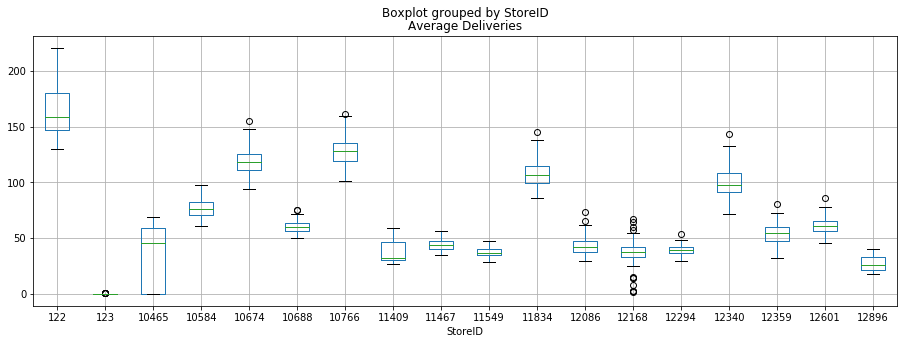

In [9]:
analysis_data.boxplot(by="StoreID",column="Average Deliveries",figsize=(15,5))
plt.show()

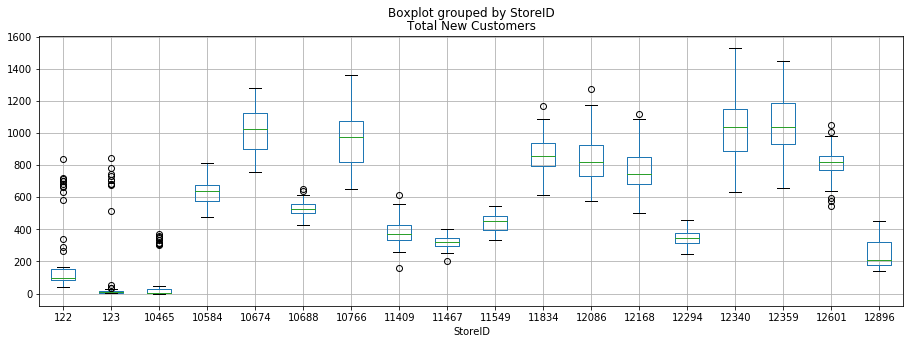

In [15]:
analysis_data.boxplot(by="StoreID",column="Total New Customers",figsize=(15,5))
plt.show()

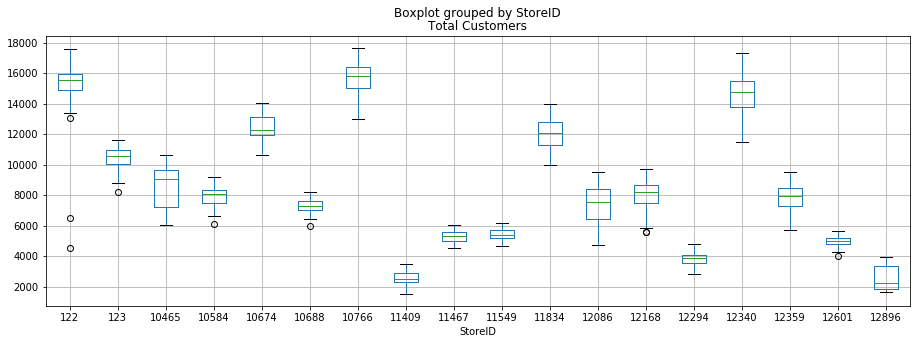

In [17]:
analysis_data.boxplot(by="StoreID",column="Total Customers",figsize=(15,5))
plt.show()

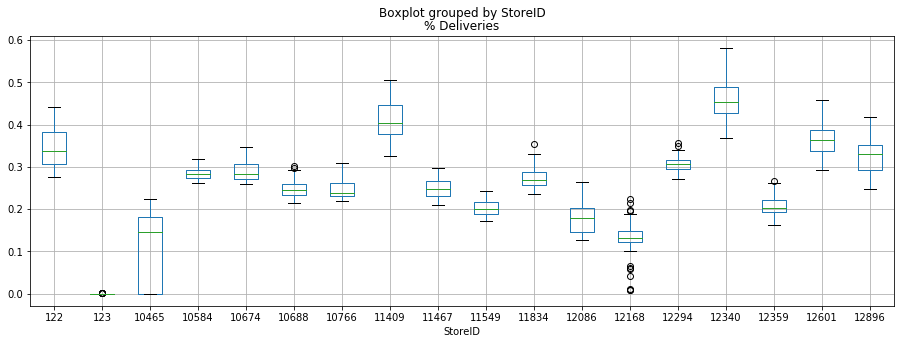

In [18]:
analysis_data.boxplot(by="StoreID",column="% Deliveries",figsize=(15,5))
plt.show()

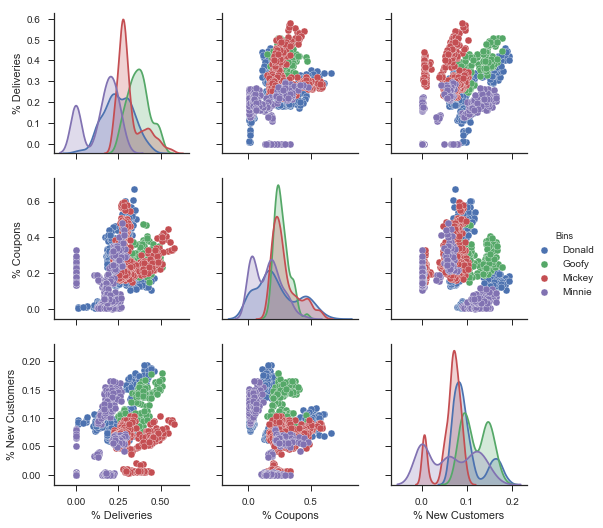

In [57]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(analysis_data[["Bins", "% Deliveries", "% Coupons", "% New Customers"]],
             vars=["% Deliveries", "% Coupons", "% New Customers"],
             hue="Bins",
             diag_kind="kde",
             diag_kws=dict(shade=True)
)
plt.show()

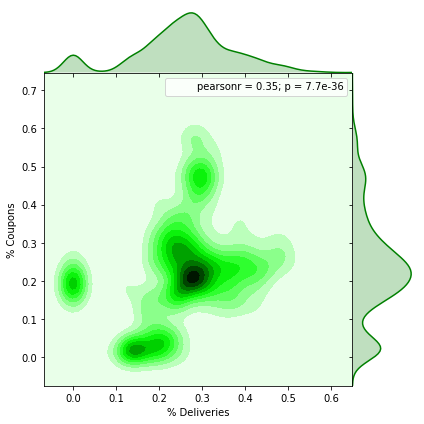

In [29]:
sns.jointplot("% Deliveries", "% Coupons", data=analysis_data,
              kind="kde", space=0, color="g")

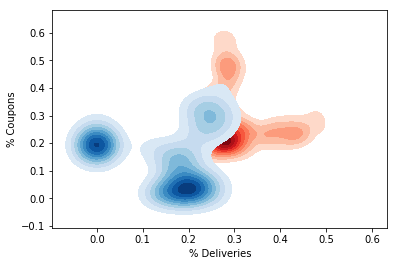

In [32]:
ax = sns.kdeplot(analysis_data.loc[analysis_data["Bins"] == "Mickey", "% Deliveries"],
                 analysis_data.loc[analysis_data["Bins"] == "Mickey", "% Coupons"],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(analysis_data.loc[analysis_data["Bins"] == "Minnie", "% Deliveries"],
                 analysis_data.loc[analysis_data["Bins"] == "Minnie", "% Coupons"],
                 cmap="Blues", shade=True, shade_lowest=False)